In [96]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm # using tqdm for progress bars.

### Reading the moviereview data using pandas

In [4]:
# import all the training and testing data into a dataframe where 1 is positive, 0 is negative

def read_TestTrain_files(folder_path):
    movie_reviews = pd.DataFrame({'Review': [], 'Category': []})
    folders = ['neg', 'pos']
    
    for f in folders:
        path  = os.path.join(folder_path, f)
        output = 1
        if f == 'neg': 
            output = 0
        for file in os.listdir(path):
            rev_category = {'Review': open(f"{path}/{file}",encoding="utf8").read(), 'Category': output}
            movie_reviews.loc[len(movie_reviews)] = rev_category
    return movie_reviews
train_data_raw = read_TestTrain_files('C:/ML/aclImdb/train')
test_data_raw = read_TestTrain_files('C:/ML/aclImdb/test') 

## Appending train, test into single 50,000 movie review dataset

In [86]:
traintest=[train_data_raw,test_data_raw]
movie_reviews=pd.concat(traintest)
movie_reviews

,Review,Category
0,Story of a man who has unnatural feelings for ...,0
1,Airport '77 starts as a brand new luxury 747 p...,0
2,This film lacked something I couldn't put my f...,0
3,"Sorry everyone,,, I know this is supposed to b...",0
4,When I was little my parents took me along to ...,0
...,...,...
24995,I was extraordinarily impressed by this film. ...,1
24996,"Although I'm not a golf fan, I attended a snea...",1
24997,"From the start of ""The Edge Of Love"", the view...",1
24998,"This movie, with all its complexity and subtle...",1


### Dropping Null values

In [87]:
movie_reviews=movie_reviews.dropna()

## Checking if there are duplicates

In [88]:
duplicates = movie_reviews[movie_reviews.duplicated()]
print('Number of duplicate Reviews : ',len(duplicates))

Number of duplicate Reviews :  418


In [89]:
movie_reviews = movie_reviews.drop_duplicates()
movie_reviews.reset_index(inplace=True)
movie_reviews = movie_reviews.drop(["index"],axis=1)

## Data Exploration

In [90]:
movie_reviews.describe()

,Category
count,49582.000000
mean,0.501876
std,0.500002
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [91]:
movie_reviews['Category'].value_counts()

Category
1    24884
0    24698
Name: count, dtype: int64

### Plotting Distribution of sentiments

Text(0.5, 1.0, 'SENTIMENTS 1- POSITIVE, 0- NEGATIVE')

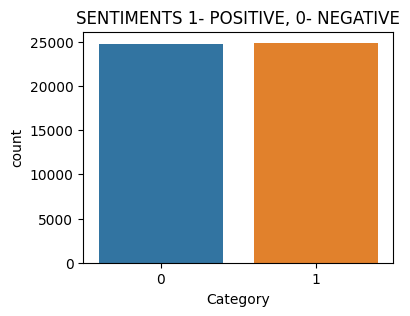

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
plt.figure(figsize=(4,3))
sns.countplot(x='Category', data=movie_reviews)
plt.title("SENTIMENTS 1- POSITIVE, 0- NEGATIVE")

## Movie Review preprocessing:

In [95]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
#need to have bs4 installed using !pip install bs4
from bs4 import BeautifulSoup

def removecontractionwords(foreachreview):
    foreachreview = re.sub(r"\'re", " are", foreachreview)
    foreachreview = re.sub(r"\'s", " is", foreachreview)
    
    foreachreview = re.sub(r"\'d", " would", foreachreview)
    foreachreview = re.sub(r"\'ll", " will", foreachreview)
    #seperating contractions of not
    foreachreview = re.sub(r"n\'t", " not", foreachreview)
    foreachreview = re.sub(r"\'t", " not", foreachreview)
    foreachreview = re.sub(r"won't", "will not", foreachreview)
    foreachreview = re.sub(r"can\'t", "can not", foreachreview)
    
    foreachreview = re.sub(r"\'ve", " have", foreachreview)
    foreachreview = re.sub(r"\'m", " am", foreachreview)
    return foreachreview

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
preprocessed_Reviews = []

for for_each_review in tqdm(movie_reviews['Review'].values):
    for_each_review = re.sub(r"http\S+", "", for_each_review)
    for_each_review = BeautifulSoup(for_each_review, 'html.parser').get_text()
    for_each_review = removecontractionwords(for_each_review)
    for_each_review = re.sub("\S*\d\S*", "", for_each_review).strip()
    for_each_review = re.sub('[^A-Za-z]+', ' ', for_each_review)
    for_each_review = ' '.join(word.lower()
                               for word in for_each_review.split() 
                               if word.lower() not in stopwords.words('english'))
    preprocessed_Reviews.append(for_each_review.strip())

100%|████████████████████████████████████████████████████████████████████████████| 49582/49582 [56:41<00:00, 14.58it/s]


In [98]:
print('\n original review :\n\n')
print(movie_reviews["Review"][0])
print('\n preprocessed review :\n\n')
print(preprocessed_Reviews[0])



 original review :


Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.

 preprocessed review :


story man unnatural feelings pig starts opening scene terrific example absurd comedy formal orchestra audience turned insane violent mob crazy chantings singers unfortunately stays absurd whole time general narrative eventually making putting even era turned cryptic dialogue would make shakespea

### Adding a column preprocessed_Reviews to the movie_reviews dataframe

In [99]:
movie_reviews["preprocessed_Reviews"] = preprocessed_Reviews 

### Saving the preprocessed datasset

In [100]:
movie_reviews.to_csv("movie_reviews_preprocessed.csv",index=None)